<a href="https://colab.research.google.com/github/MCPMAlf/An-lisis-de-Datos/blob/main/RicardoAlfonso_Tarea2_Inferencia_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Importa paquetes necesarios
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.interpolate import lagrange

# Problema 1:

Los siguientes datos

In [38]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=\frac{1}{a}\cdot\frac{1}{2\pi}(1+\cos(\frac{x-b}{a}))$$
para $$-\pi < x/a-b/a <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b/a" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [39]:
#Primeras pruebas

#Obtención de la escala y localización con Cosine.fit
print(stats.cosine.fit(x))

#Ver como funciona cosine de Stats con escala y localización fijas
escala = 1.4378613018727644
localizacion = 2.1812291723471624
x_val = 2
C_cons = 0
np.array(stats.cosine.rvs(localizacion, escala, size = len(x)))

print(len(x))


(2.1812291723471624, 1.4378613018727644)
100


[array(-0.06929368), array(1.26301496), array(1.98417258), array(3.11628667), array(3.82315422), array(5.08893051), array(5.81910636), array(6.96211202), array(7.96767521), array(9.06600784), array(9.93598469), array(10.8693324), array(11.8737262), array(12.91959898), array(14.01524518), array(15.02031669), array(16.1548905), array(17.03402317), array(18.01781483), array(19.2336148), array(19.93318128), array(20.7471216), array(22.15484498), array(23.09475616), array(24.20514001), array(24.88751146), array(25.94904431), array(27.10432768), array(28.10260165), array(29.00151686), array(30.18872564), array(30.95930403), array(31.98166609), array(33.08089638), array(34.01260811), array(34.98470424), array(35.7328777), array(37.15294405), array(38.27565267), array(39.05985772), array(39.93569416), array(40.90736775), array(41.93140508), array(42.73839478), array(43.95162618), array(45.01799563), array(45.94629777), array(47.03364872), array(47.98302905), array(48.841072), array(49.92905725

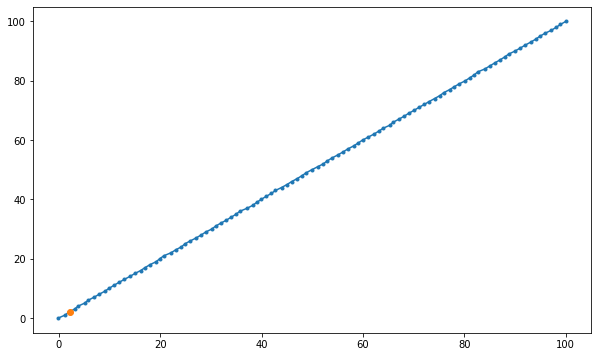

In [40]:
#Sugerencia del profesor para resolver el problema 1

#Fijamos el valor de la escala y variamos el valor de localizacion.
escala = 1
localizacion = np.arange(0,101)

#Definimos una lista vacía
Media_DatosGenerados = list()

for i in localizacion:
  Media_DatosGenerados.append(np.array( np.mean( stats.cosine.rvs( localizacion[i], escala, size = len(x) ) ) ))

#Visualización de los datos
print(Media_DatosGenerados)
print(np.mean(x))

#Grafica de media respecto al valor de la localización
plt.figure(figsize=(10,6))
plt.plot(Media_DatosGenerados, localizacion, marker = '.')
plt.plot(np.mean(x), np.mean(x), marker = 'o')


2.276872712926973
[0.0, 0.7131807792089687, 2.0711467500513003, 6.509259283037249, 9.098040288085524, 16.324917634356378, 21.667034443859574, 31.66990538078887, 37.401225299666415, 63.49234798105299, 62.8194197103577, 82.27082284705929, 88.97432634221245, 114.39690265692857, 136.15892345517034, 143.03667802759668, 169.45135807624126, 170.31119023584972, 266.8349476194658, 231.0432466010764, 249.14283670986507, 295.0635277818255, 346.04465576414805, 364.98394705180516, 357.59463864165394, 439.3094226309443, 410.9460601783654, 447.01114501875645, 525.4194174113946, 457.9437505935782, 567.3505397351618, 761.8758039316864, 629.2708616308255, 787.9127049033625, 744.0676223774542, 692.9149675800263, 747.7958781279422, 906.0346596092267, 914.5991041019577, 909.1633397546054, 943.9853181669357, 1141.2518164213727, 1014.0401300843472, 1141.289028481154, 1081.1445944589757, 1662.6353093376197, 1411.2868132629142, 1677.1662435784829, 1899.6983778447395, 1667.113762074545, 1579.4701656027785, 1861

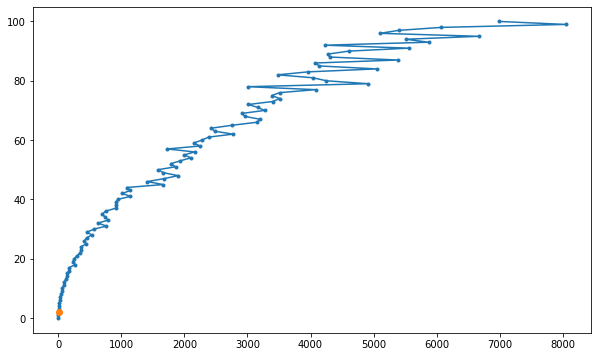

In [41]:
#Sugerencia del profesor para resolver el problema 1, parte 2

#Fijamos el valor de la localización y variamos el valor de la escala.
escala = np.arange(0,101)
localizacion = np.mean(x)

#Definimos una lista vacía
Varianza_DatosGenerados = list()

for i in escala:
  Varianza_DatosGenerados.append(np.array( np.var( stats.cosine.rvs( localizacion, escala[i], size = len(x) ) ) )/2)

pol = lagrange(Varianza_DatosGenerados, escala) 

print(pol(np.var(x)))

#Visualización de los datos
print(Varianza_DatosGenerados)
print(np.var(x))

#Grafica de media respecto al valor de la localización
plt.figure(figsize=(10,6))
plt.plot(Varianza_DatosGenerados, escala, marker = '.')
plt.plot(np.mean(x), np.mean(x), marker = 'o')


In [42]:
#Creación de datos usando la media de x como un estimador de b/a

#Fijamos el valor de la escala y variamos el valor de localizacion.
escala = np.var(x)/2
localizacion = np.mean(x)
Simulaciones = np.arange(0,10001)

#Definimos una lista vacía
Media_DatosSimulacion = list()
Varianza_DatosSimulados = list()

for i in Simulaciones:
  Media_DatosSimulacion.append(np.array( np.mean( stats.cosine.rvs( localizacion, escala, size = len(x) ) ) ))
  Varianza_DatosSimulados.append(np.array( np.var( stats.cosine.rvs( localizacion, escala, size = len(x) ) ) )/2)

#Media_DatosSimulacion = Media_DatosSimulacion.sort()

#Visualización de los datos
#print(Media_DatosSimulacion)
#print(np.mean(Media_DatosSimulacion))

#Intervalo analítico a partir de la media de los datos simulados:

Intervalo_Media = (np.mean(Media_DatosSimulacion)-(1.96)*( np.std(Media_DatosSimulacion) / np.sqrt(len(Media_DatosSimulacion) ) ) , np.mean(Media_DatosSimulacion) + 1.96*( np.std(Media_DatosSimulacion) / np.sqrt(len(Media_DatosSimulacion) ) ))
print(Intervalo_Media)

Intervalo_Var = (np.mean(Varianza_DatosSimulados)-(1.96)*( np.std(Varianza_DatosSimulados) / np.sqrt(len(Varianza_DatosSimulados) ) ) , np.mean(Varianza_DatosSimulados) + 1.96*( np.std(Varianza_DatosSimulados) / np.sqrt(len(Varianza_DatosSimulados) ) ))
print(Intervalo_Var)

[array(2.01160215), array(2.38887693), array(2.09113402), array(2.05563457), array(2.29218703), array(2.32025924), array(2.13354067), array(2.39371649), array(2.25162471), array(2.33522329), array(2.1055875), array(1.9885254), array(2.12560709), array(1.70126557), array(2.11050161), array(2.33483623), array(2.1990872), array(2.02998108), array(1.92592565), array(2.03988096), array(2.04383212), array(2.04278185), array(1.88324117), array(1.94406317), array(2.23621195), array(1.96092096), array(2.01914458), array(2.12307979), array(1.9443486), array(1.92975584), array(1.99259442), array(2.14594518), array(2.17949067), array(2.461438), array(2.26130241), array(2.00227586), array(2.02469987), array(2.22314739), array(2.2363338), array(2.0662673), array(2.49223133), array(2.17006438), array(2.04034183), array(2.12870664), array(2.21730097), array(2.25107579), array(2.02949638), array(2.06612732), array(2.49672105), array(2.16565477), array(2.22224897), array(2.25085444), array(2.17010151), 

# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y estima el intervalo de confianza del 95%. 

In [48]:
x_Secuencia = (x,)
res = stats.bootstrap(x_Secuencia, np.mean, confidence_level=0.95)
print(res.confidence_interval)

print(stats.cosine.fit(x))

ConfidenceInterval(low=1.7891598246503346, high=2.4738089218120853)
(2.1812291723471624, 1.4378613018727644)


# **Conclusión problema 2:**
El intervalo de confianza usando bootstrap como método del cálculo es (1.8122639505017448, 2.47734064617655).
Es decir, la media de los datos estará dentro de ese intervalo con 95% de certeza.
Ejemplo en siguiente línea.

In [57]:
escala = 1.4378613018727644
localizacion = 2.1812291723471624
x_val = 2
C_cons = 0
Arreglo = np.array(stats.cosine.rvs(localizacion, escala, size = 10000))
Arreglo.mean()



2.169560278876509

In [25]:
#Trabajo desde Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Importamos Base de datos desde Drive
File_Name_Calificaciones = "/content/drive/MyDrive/Colab Notebooks/AnalisisDeDatos/Proyectos/Proyecto2/calificaciones.csv"
File_Name_Datos = "/content/drive/MyDrive/Colab Notebooks/AnalisisDeDatos/Proyectos/Proyecto2/datos.csv"

#Creación DataFrame de calificaciones y datos
DataFrame_Calificaciones = pd.read_csv(File_Name_Calificaciones)
DataFrame_Datos = pd.read_csv(File_Name_Datos)

# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

¿Provienen de distribuciones distintas?

# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

In [27]:
import seaborn as sns

In [28]:
#Importamos Base de datos desde Drive
File_Name_Calificaciones = "/content/drive/MyDrive/Colab Notebooks/AnalisisDeDatos/Proyectos/Proyecto2/calificaciones.csv"
File_Name_Datos = "/content/drive/MyDrive/Colab Notebooks/AnalisisDeDatos/Proyectos/Proyecto2/datos.csv"

#Creación DataFrame de calificaciones y datos
DataFrame_Calificaciones = pd.read_csv(File_Name_Calificaciones)
DataFrame_Datos = pd.read_csv(File_Name_Datos)

In [29]:
#Visualización de las calificaciones
#print(DataFrame_Calificaciones)

#Prueba
Prueba = DataFrame_Calificaciones

Columnas = Prueba['Grupo'].unique()
Prueba = Prueba.drop(['Estudiante'], axis = 1)

ValoresGrupos = list()


for i in Columnas:
  ValoresGrupos.append( Prueba.loc[Prueba['Grupo'] == i ]['Calificación'] )
  

DataFrame_Prueba = pd.DataFrame(np.array(ValoresGrupos).transpose(), columns = Columnas)
DataFrame_Prueba




,Grupo A,Grupo B,Grupo C
0,8.6,6.9,9.2
1,7.9,7.4,8.6
2,6.5,8.2,7.7
3,9.1,7.8,8.9
4,8.0,6.7,9.0
5,7.2,8.3,9.5


In [30]:
#Prueba ANOVA

F_Val, p_Val = stats.f_oneway(DataFrame_Prueba['Grupo A'], DataFrame_Prueba['Grupo B'], DataFrame_Prueba['Grupo C'])
print(F_Val, p_Val)

4.537127265640226 0.02877650747111931


# **Conclusión Problema 3**
Por lo tanto dado que p = 0.02877650 < 0.05, rechazamos $H_0$, es decir, se puede concluir que los promedios de las calificaciones no son los mismos entre los grupos evaluados, con un nivel de significancia $ \alpha = 0.05 $ . 

In [31]:
#Visualización de los datos
print(DataFrame_Datos)

      Grupo  Datos
0   Grupo A    5.8
1   Grupo A    3.1
2   Grupo A    7.2
3   Grupo A    2.6
4   Grupo A    6.7
5   Grupo A    4.5
6   Grupo B    1.9
7   Grupo B    8.5
8   Grupo B    4.3
9   Grupo B    6.8
10  Grupo B    2.1
11  Grupo B    7.4


In [32]:
#Creacion de DataFrame con Grupos como columans

#DataFrame_Calificaciones

Columnas = DataFrame_Datos['Grupo'].unique()

ValoresGrupos_Datos = list()


for i in Columnas:
  ValoresGrupos_Datos.append( DataFrame_Datos.loc[Prueba['Grupo'] == i ]['Datos'] )
  

DataFrame_Ordenada = pd.DataFrame(np.array(ValoresGrupos_Datos).transpose(), columns = Columnas)
DataFrame_Ordenada

,Grupo A,Grupo B
0,5.8,1.9
1,3.1,8.5
2,7.2,4.3
3,2.6,6.8
4,6.7,2.1
5,4.5,7.4


Index(['Grupo A', 'Grupo B'], dtype='object')


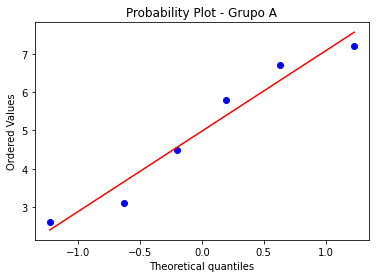

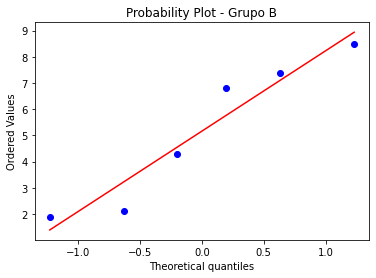

In [33]:
#Problema 4 - Parte 1: Gráficos
print(DataFrame_Ordenada.columns)
for grupo in DataFrame_Ordenada.columns:
    stats.probplot(DataFrame_Ordenada[grupo], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  grupo)
    plt.show()

In [34]:
#Prueba de normalidad Shapiro-Wilk
shapiro_test_GrupoA = stats.shapiro(DataFrame_Ordenada['Grupo A'])
print(shapiro_test_GrupoA)

shapiro_test_GrupoB = stats.shapiro(DataFrame_Ordenada['Grupo B'])
print(shapiro_test_GrupoB)

ShapiroResult(statistic=0.9267435669898987, pvalue=0.555199146270752)
ShapiroResult(statistic=0.8947597146034241, pvalue=0.34388166666030884)


# **Conclusiones Problema 4, parte 1:**

Al aplicar la prueba de Shapiro-Wilk al grupo A y B, obtuvieron valores p iguales a 0.55519914 y 0.34388166 respectivamente. Por lo tanto, no se puede rechazar la hipótesis nula con un nivel de significancia $\alpha = 0.05$ . Por lo tanto, se pued asumir que ambas muestras provienen de una distribución normal.

In [35]:
#Parte 2: Prueba no paramétrica de medianas

Prueba = stats.mannwhitneyu(DataFrame_Ordenada['Grupo A'], DataFrame_Ordenada['Grupo B'])
Prueba

MannwhitneyuResult(statistic=17.0, pvalue=0.9372294372294373)

# **Conclusiones Problema 4, parte 2:**
Dado que el valor de p es igual a 0.93722943, se puede concluir que no se rechaza la hipótesis nula con un nivel de significancia $\alpha = 0.05$ .
Por lo tanto, no hay una diferencia estadísticamente significativa entre las medianas del Grupo A y el Grupo B.